# importing the library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from LinearRegressionModel import LinearRegression


iterations = 100000
learning_rate = 0.01


# insight of the data

In [3]:
df = pd.read_csv('StudentsPerformance.csv')

print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [4]:
# check for missing values
print("\nData types of each column:")
print(df.info())


Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [5]:
print("Summary of 'object' columns:")
display(df.describe(include='object'))

print("Summary of 'non-object' columns:")
display(df.describe())

Summary of 'object' columns:


,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


Summary of 'non-object' columns:


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
print("Number of missing values in each column:")
print(df.isnull().sum())

Number of missing values in each column:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [7]:
for columns in df.select_dtypes(include=['object']).columns:
    print(f"\nValue counts for column '{columns}':")
    print(df[columns].value_counts())


Value counts for column 'gender':
gender
female    518
male      482
Name: count, dtype: int64

Value counts for column 'race/ethnicity':
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

Value counts for column 'parental level of education':
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

Value counts for column 'lunch':
lunch
standard        645
free/reduced    355
Name: count, dtype: int64

Value counts for column 'test preparation course':
test preparation course
none         642
completed    358
Name: count, dtype: int64


# visualisation of the data

In [8]:
# 1. Define Bins and Labels
bins = [-1, 59.99, 69.99, 79.99, 89.99, 100]
labels = [0, 1, 2, 3, 4]

### math score

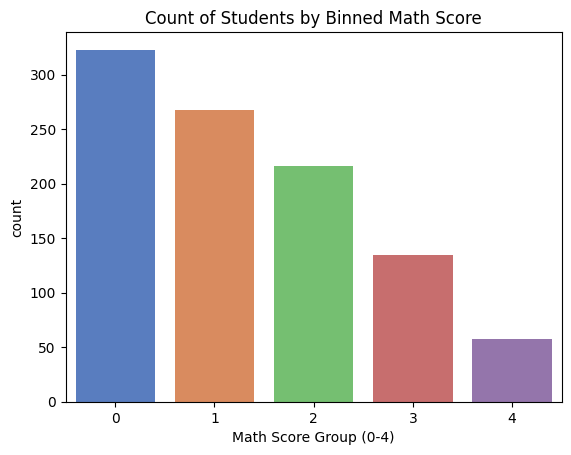

In [9]:
# 2. Use pd.cut() directly in the countplot call
p = sns.countplot(
    x=pd.cut(df['math score'], bins=bins, labels=labels, right=True), 
    hue=pd.cut(df['math score'], bins=bins, labels=labels, right=True), 
    data=df,
    palette="muted",
    legend=False
)

# Set descriptive labels for the axes
plt.title('Count of Students by Binned Math Score')
plt.xlabel('Math Score Group (0-4)')

_ = plt.setp(p.get_xticklabels(), rotation=0)
plt.show()

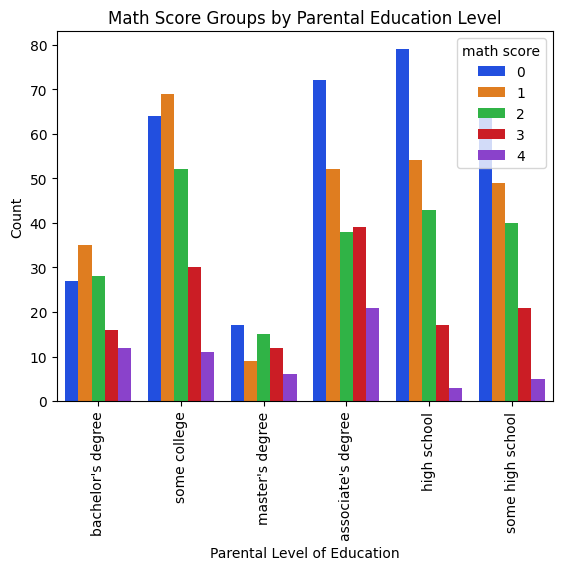

In [10]:
# 2. Use pd.cut() to group the 'math score' for the 'hue' argument
p = sns.countplot(
    x='parental level of education', 
    hue=pd.cut(df['math score'], bins=bins, labels=labels, right=True), 
    data=df,    
    palette='bright'
)

# Set descriptive labels for clarity
plt.title('Math Score Groups by Parental Education Level')
plt.xlabel('Parental Level of Education')
plt.ylabel('Count')

_ = plt.setp(p.get_xticklabels(), rotation=90)
plt.show()

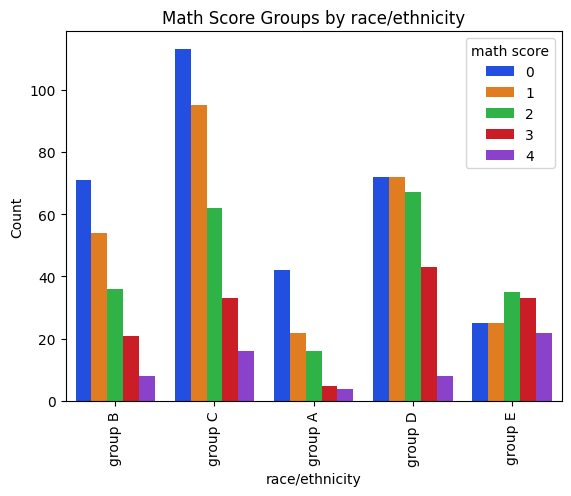

In [11]:
# 2. Use pd.cut() to group the 'math score' for the 'hue' argument
p = sns.countplot(
    x='race/ethnicity', 
    hue=pd.cut(df['math score'], bins=bins, labels=labels, right=True), 
    data=df,    
    palette='bright'
)

# Set descriptive labels for clarity
plt.title('Math Score Groups by race/ethnicity')
plt.xlabel('race/ethnicity')
plt.ylabel('Count')

_ = plt.setp(p.get_xticklabels(), rotation=90)
plt.show()

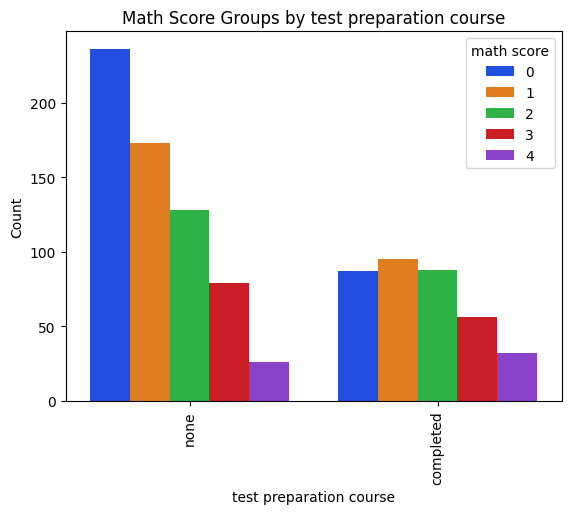

In [12]:
# 2. Use pd.cut() to group the 'math score' for the 'hue' argument
p = sns.countplot(
    x='test preparation course', 
    hue=pd.cut(df['math score'], bins=bins, labels=labels, right=True), 
    data=df,    
    palette='bright'
)

# Set descriptive labels for clarity
plt.title('Math Score Groups by test preparation course')
plt.xlabel('test preparation course')
plt.ylabel('Count')

_ = plt.setp(p.get_xticklabels(), rotation=90)
plt.show()

### reading score

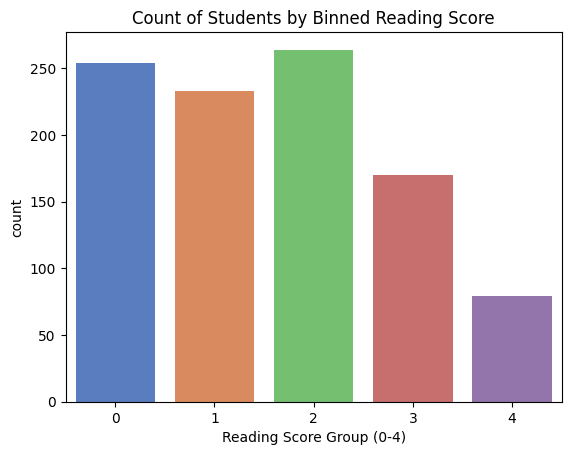

In [13]:
# 2. Use pd.cut() directly in the countplot call
p = sns.countplot(
    x=pd.cut(df['reading score'], bins=bins, labels=labels, right=True), 
    hue=pd.cut(df['reading score'], bins=bins, labels=labels, right=True),     
    data=df,
    palette="muted",
    legend=False
)

# Set descriptive labels for the axes
plt.title('Count of Students by Binned Reading Score')
plt.xlabel('Reading Score Group (0-4)')

_ = plt.setp(p.get_xticklabels(), rotation=0)
plt.show()

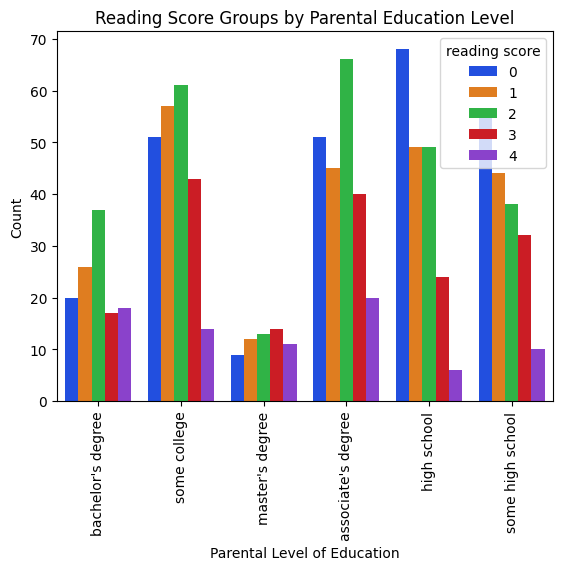

In [14]:
# 2. Use pd.cut() to group the 'reading score' for the 'hue' argument
p = sns.countplot(
    x='parental level of education', 
    hue=pd.cut(df['reading score'], bins=bins, labels=labels, right=True), 
    data=df,    
    palette='bright'
)

# Set descriptive labels for clarity
plt.title('Reading Score Groups by Parental Education Level')
plt.xlabel('Parental Level of Education')
plt.ylabel('Count')

_ = plt.setp(p.get_xticklabels(), rotation=90)
plt.show()

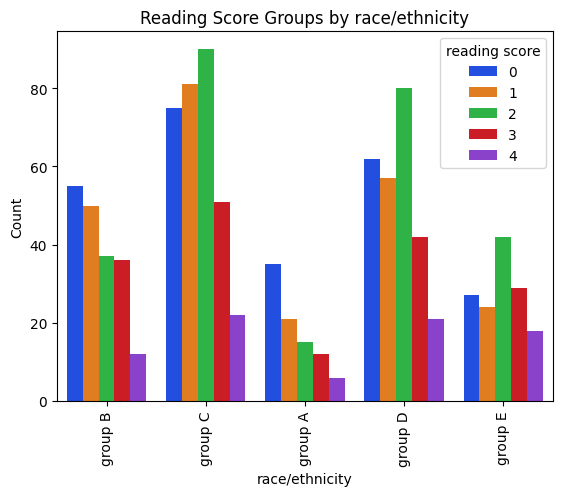

In [15]:
# 2. Use pd.cut() to group the 'reading score' for the 'hue' argument
p = sns.countplot(
    x='race/ethnicity', 
    hue=pd.cut(df['reading score'], bins=bins, labels=labels, right=True), 
    data=df,    
    palette='bright'
)

# Set descriptive labels for clarity
plt.title('Reading Score Groups by race/ethnicity')
plt.xlabel('race/ethnicity')
plt.ylabel('Count')

_ = plt.setp(p.get_xticklabels(), rotation=90)
plt.show()

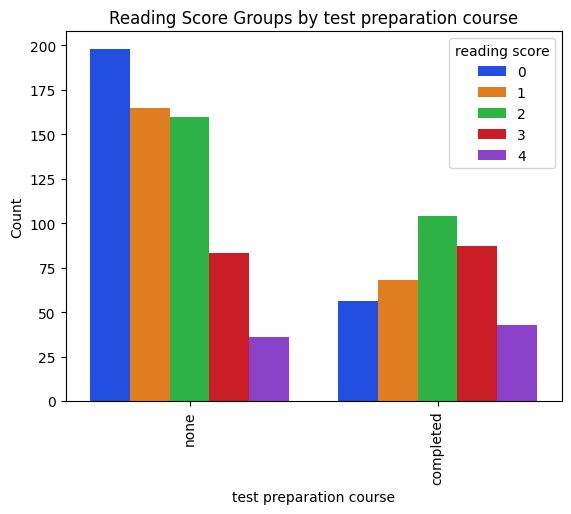

In [16]:
# 2. Use pd.cut() to group the 'reading score' for the 'hue' argument
p = sns.countplot(
    x='test preparation course', 
    hue=pd.cut(df['reading score'], bins=bins, labels=labels, right=True), 
    data=df,    
    palette='bright'
)

# Set descriptive labels for clarity
plt.title('Reading Score Groups by test preparation course')
plt.xlabel('test preparation course')
plt.ylabel('Count')

_ = plt.setp(p.get_xticklabels(), rotation=90)
plt.show()

### writing score

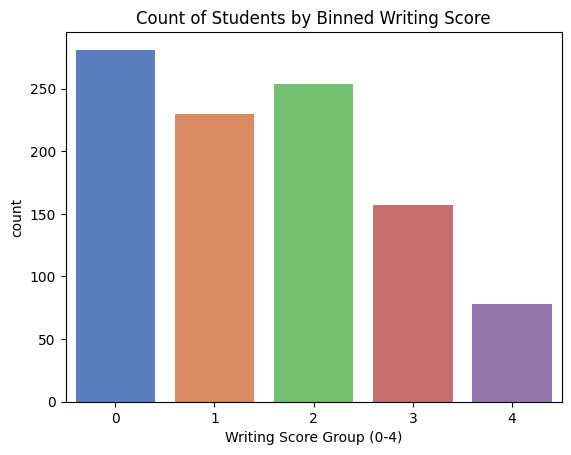

In [17]:
# 2. Use pd.cut() directly in the countplot call
p = sns.countplot(
    x=pd.cut(df['writing score'], bins=bins, labels=labels, right=True), 
    hue=pd.cut(df['writing score'], bins=bins, labels=labels, right=True),     
    data=df,
    palette="muted",
    legend=False
)

# Set descriptive labels for the axes
plt.title('Count of Students by Binned Writing Score')
plt.xlabel('Writing Score Group (0-4)')

_ = plt.setp(p.get_xticklabels(), rotation=0)
plt.show()

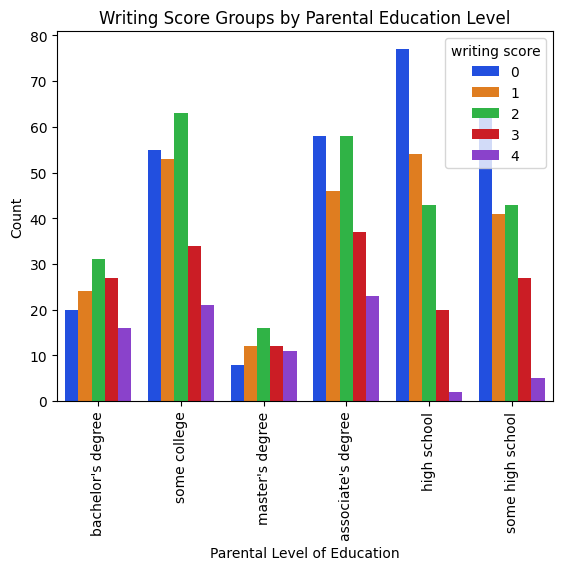

In [18]:
# 2. Use pd.cut() to group the 'writing score' for the 'hue' argument
p = sns.countplot(
    x='parental level of education', 
    hue=pd.cut(df['writing score'], bins=bins, labels=labels, right=True), 
    data=df,    
    palette='bright'
)

# Set descriptive labels for clarity
plt.title('Writing Score Groups by Parental Education Level')
plt.xlabel('Parental Level of Education')
plt.ylabel('Count')

_ = plt.setp(p.get_xticklabels(), rotation=90)
plt.show()

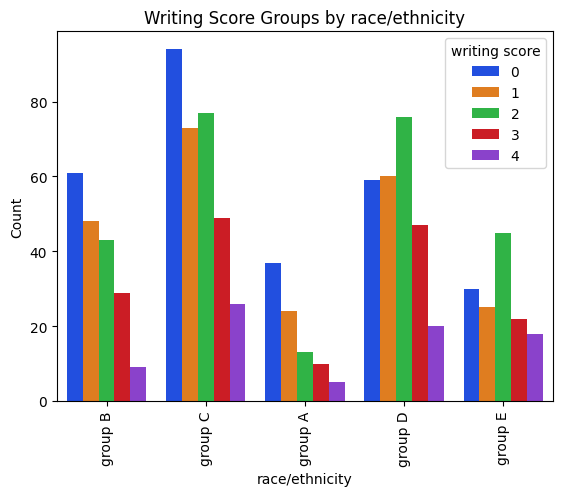

In [19]:
# 2. Use pd.cut() to group the 'writing score' for the 'hue' argument
p = sns.countplot(
    x='race/ethnicity', 
    hue=pd.cut(df['writing score'], bins=bins, labels=labels, right=True), 
    data=df,    
    palette='bright'
)

# Set descriptive labels for clarity
plt.title('Writing Score Groups by race/ethnicity')
plt.xlabel('race/ethnicity')
plt.ylabel('Count')

_ = plt.setp(p.get_xticklabels(), rotation=90)
plt.show()

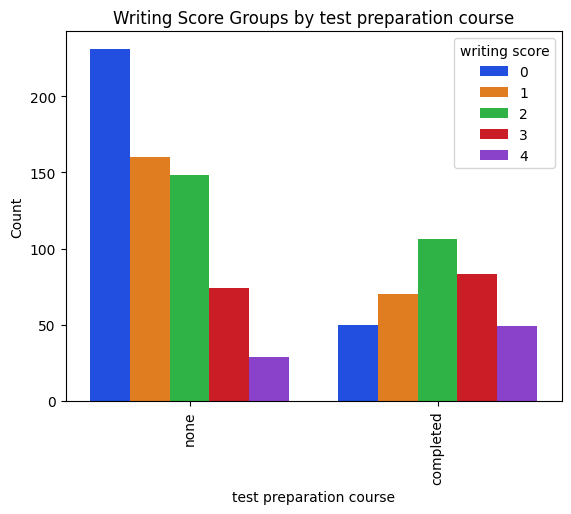

In [20]:
# 2. Use pd.cut() to group the 'writing score' for the 'hue' argument
p = sns.countplot(
    x='test preparation course', 
    hue=pd.cut(df['writing score'], bins=bins, labels=labels, right=True), 
    data=df,    
    palette='bright'
)

# Set descriptive labels for clarity
plt.title('Writing Score Groups by test preparation course')
plt.xlabel('test preparation course')
plt.ylabel('Count')

_ = plt.setp(p.get_xticklabels(), rotation=90)
plt.show()

# data preprocessing

In [21]:
bins = [-1, 59.99, 69.99, 79.99, 89.99, 100]
labels = [0, 1, 2, 3, 4]

score_cols = ['math score', 'reading score', 'writing score']

for col in score_cols:
    # Create a new column name for the grade
    
    df[col] = pd.cut(
        df[col],
        bins=bins,
        labels=labels,
        right=True,
        include_lowest=True,
        ordered=True    
        )

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       1000 non-null   object  
 1   race/ethnicity               1000 non-null   object  
 2   parental level of education  1000 non-null   object  
 3   lunch                        1000 non-null   object  
 4   test preparation course      1000 non-null   object  
 5   math score                   1000 non-null   category
 6   reading score                1000 non-null   category
 7   writing score                1000 non-null   category
dtypes: category(3), object(5)
memory usage: 42.7+ KB
None


In [22]:
two_category_cols = []
mul_category_cols = []

for columns in df.select_dtypes(include=['object']).columns:
    if df[columns].nunique() == 2:
        two_category_cols.append(columns)
    else:
        mul_category_cols.append(columns)

# Apply One-Hot Encoding using sklearn's ColumnTransformer
if mul_category_cols:
    ohe = OneHotEncoder(drop='first', sparse_output=False)    
    encoded_data = ohe.fit_transform(df[mul_category_cols])
    encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(mul_category_cols))
    df = pd.concat([df.drop(columns=mul_category_cols), encoded_df], axis=1)


# Apply Label Encoding for binary categorical columns
if two_category_cols:
    le = LabelEncoder()
    for col in two_category_cols:
        df[col] = le.fit_transform(df[col])

print("\nData after encoding:")
print(df.head())



Data after encoding:
   gender  lunch  test preparation course math score reading score  \
0       0      1                        1          2             2   
1       0      1                        0          1             4   
2       0      1                        1          4             4   
3       1      0                        1          0             0   
4       1      1                        1          2             2   

  writing score  race/ethnicity_group B  race/ethnicity_group C  \
0             2                     1.0                     0.0   
1             3                     0.0                     1.0   
2             4                     1.0                     0.0   
3             0                     0.0                     0.0   
4             2                     0.0                     1.0   

   race/ethnicity_group D  race/ethnicity_group E  \
0                     0.0                     0.0   
1                     0.0                     0.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   gender                                         1000 non-null   int64   
 1   lunch                                          1000 non-null   int64   
 2   test preparation course                        1000 non-null   int64   
 3   math score                                     1000 non-null   category
 4   reading score                                  1000 non-null   category
 5   writing score                                  1000 non-null   category
 6   race/ethnicity_group B                         1000 non-null   float64 
 7   race/ethnicity_group C                         1000 non-null   float64 
 8   race/ethnicity_group D                         1000 non-null   float64 
 9   race/ethnicity_group E                    

In [24]:
X = df.drop(['math score', 'reading score', 'writing score'], axis=1)
X_values = X.values

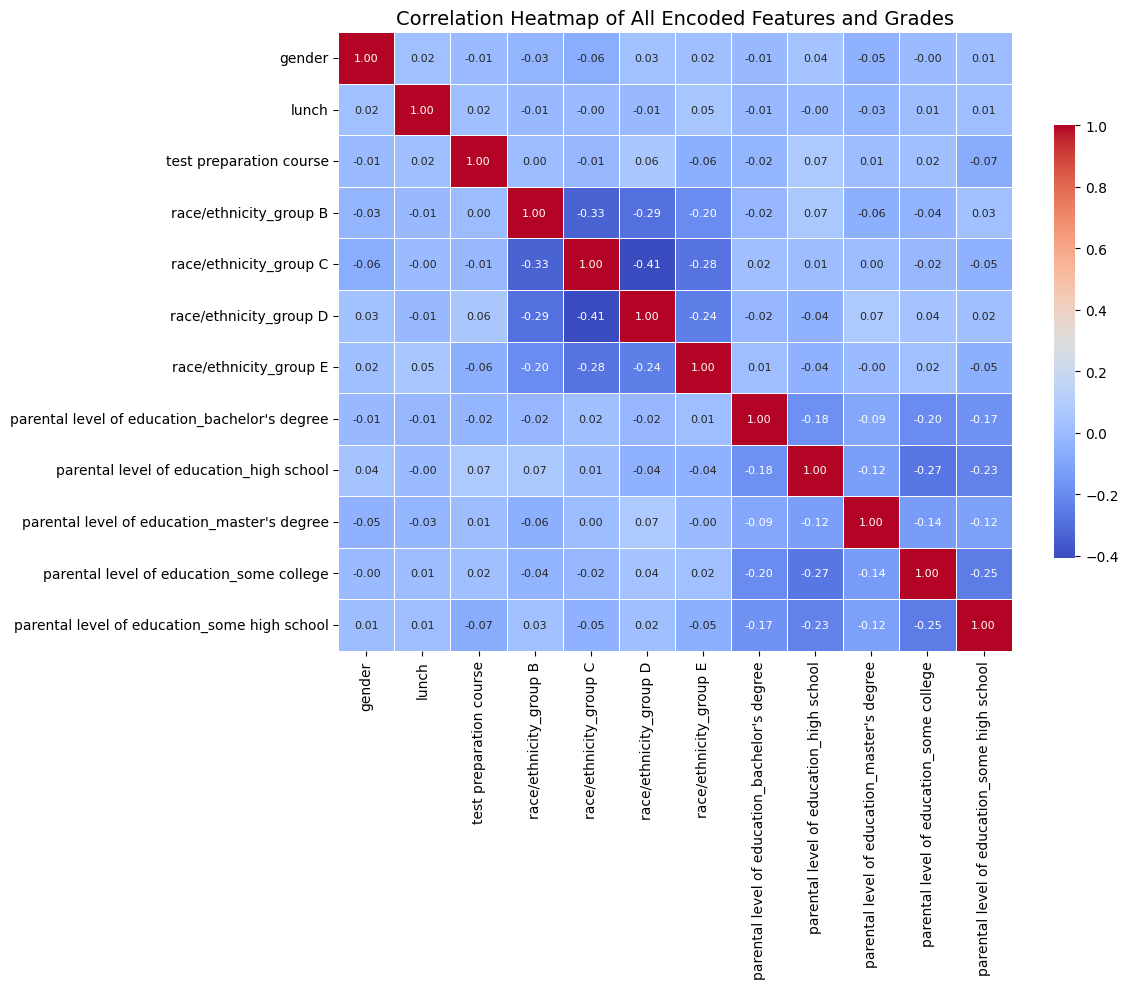

In [25]:
X = df.drop(['math score', 'reading score', 'writing score'], axis=1)
corr_matrix = X.corr()

# Set up the plot
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix, 
    annot=True, # Display correlation values on the map
    annot_kws={"size": 8},
    fmt=".2f", # Format numbers to 2 decimal places
    cmap='coolwarm', # Color map choice
    linewidths=0.5,
    cbar_kws={'shrink': 0.7}
)
plt.title('Correlation Heatmap of All Encoded Features and Grades', fontsize=14)
plt.tight_layout()

# predicting for math score

In [26]:
y_math = df['math score']
y_values = y_math.astype(int).values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X_values, 
                                                    y_values, 
                                                    test_size=0.2, 
                                                    random_state=42
                                                    )

Training Linear Regression: 100%|██████████| 100000/100000 [00:38<00:00, 2597.79it/s, MSE=1.1795, w_norm=1.46]


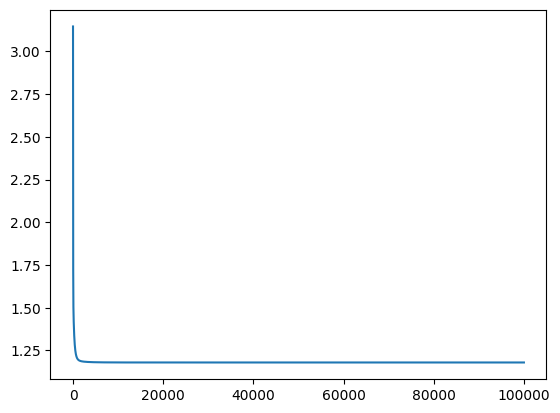

In [27]:
n_feature = X_train.shape[1]
model_math= LinearRegression(n_features=n_feature)
loss = model_math.train(X_train, y_train, 
                        iterations=iterations, 
                        learning_rate=learning_rate
                        )

plt.plot(loss)  
plt.show()


In [28]:
weights, bias = model_math.get_weights()

print("--- Model Parameter ---")

# Learned Parameters (The Result)
print("LEARNED PARAMETERS (weights, bias):")
print(f"  Learned Weights (w): \n{weights}")
print(f"  Learned Bias (bias): {bias:.4f}")

--- Model Parameter ---
LEARNED PARAMETERS (weights, bias):
  Learned Weights (w): 
[ 0.36032847  0.81462578 -0.43137616  0.15059956  0.11256166  0.32766147
  0.88605695  0.25176332 -0.32017856  0.14855788 -0.07720149 -0.17289501]
  Learned Bias (bias): 0.7342


In [29]:
y_pred = model_math.predict(X_train)

mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared Score (R2): {r2:.4f}")

Mean Squared Error (MSE): 1.1795
Root Mean Squared Error (RMSE): 1.0860
Mean Absolute Error (MAE): 0.9025
R-squared Score (R2): 0.2257


In [30]:
y_pred = model_math.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared Score (R2): {r2:.4f}")

Mean Squared Error (MSE): 1.1553
Root Mean Squared Error (RMSE): 1.0748
Mean Absolute Error (MAE): 0.8939
R-squared Score (R2): 0.1329


# predicting for reading score

In [31]:
y_reading = df['reading score']
y_values = y_reading.astype(int).values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X_values,
                                                    y_values, 
                                                    test_size=0.2, 
                                                    random_state=42
                                                    )

Training Linear Regression: 100%|██████████| 100000/100000 [00:35<00:00, 2856.35it/s, MSE=1.2464, w_norm=1.28]


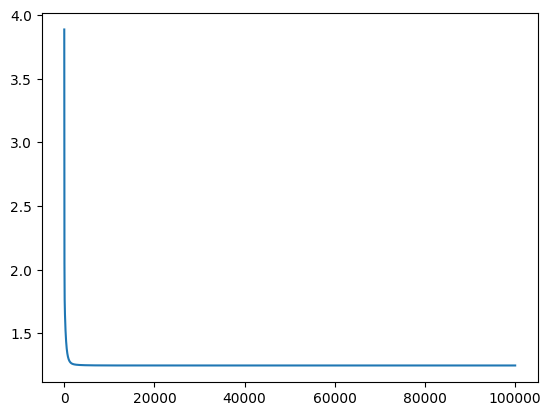

In [32]:
n_feature = X_train.shape[1]
model_reading = LinearRegression(n_features=n_feature)
loss = model_reading.train(X_train, y_train, 
                           iterations=iterations, 
                           learning_rate=learning_rate
                           )

plt.plot(loss)  
plt.show()

In [33]:
weights, bias = model_reading.get_weights()

print("--- Model Parameter ---")

# Learned Parameters (The Result)
print("LEARNED PARAMETERS (weights, bias):")
print(f"  Learned Weights (w): \n{weights}")
print(f"  Learned Bias (bias): {bias:.4f}")

--- Model Parameter ---
LEARNED PARAMETERS (weights, bias):
  Learned Weights (w): 
[-0.64209481  0.60923243 -0.65306425 -0.00903782  0.03645632  0.19667708
  0.35105594  0.27188119 -0.32071217  0.15079826 -0.09708879 -0.2423235 ]
  Learned Bias (bias): 1.9164


In [34]:
y_pred = model_reading.predict(X_train)

mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared Score (R2): {r2:.4f}")

Mean Squared Error (MSE): 1.2464
Root Mean Squared Error (RMSE): 1.1164
Mean Absolute Error (MAE): 0.9301
R-squared Score (R2): 0.2163


In [35]:
y_pred = model_reading.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared Score (R2): {r2:.4f}")

Mean Squared Error (MSE): 1.2283
Root Mean Squared Error (RMSE): 1.1083
Mean Absolute Error (MAE): 0.9267
R-squared Score (R2): 0.1529


# predicting for writing score

In [36]:
y_writing = df['writing score']
y_values = y_writing.astype(int).values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X_values, 
                                                    y_values, 
                                                    test_size=0.2, 
                                                    random_state=42
                                                    )

Training Linear Regression: 100%|██████████| 100000/100000 [00:34<00:00, 2924.58it/s, MSE=1.1120, w_norm=1.58]


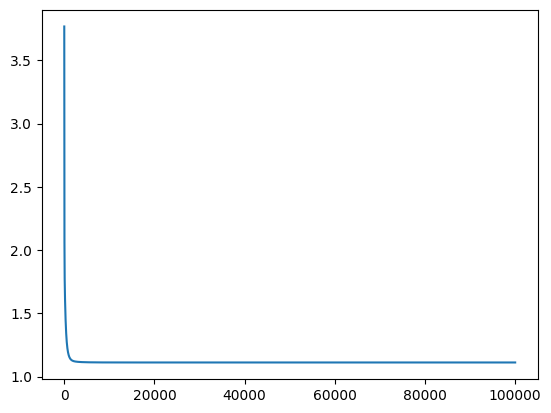

In [37]:
n_feature = X_train.shape[1]
model_writing = LinearRegression(n_features=n_feature)
loss = model_writing.train(X_train, y_train, 
                           iterations=iterations, 
                           learning_rate=learning_rate
                           )

plt.plot(loss)  
plt.show()

In [38]:
weights, bias = model_writing.get_weights()

print("--- Model Parameter ---")

# Learned Parameters (The Result)
print("LEARNED PARAMETERS (weights, bias):")
print(f"  Learned Weights (w): \n{weights}")
print(f"  Learned Bias (bias): {bias:.4f}")

--- Model Parameter ---
LEARNED PARAMETERS (weights, bias):
  Learned Weights (w): 
[-0.80053161  0.66668277 -0.827715    0.03393538  0.09379597  0.33942631
  0.34097355  0.36198298 -0.44110423  0.15793072 -0.03526695 -0.36656974]
  Learned Bias (bias): 1.9661


In [39]:
y_pred = model_writing.predict(X_train)

mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared Score (R2): {r2:.4f}")

Mean Squared Error (MSE): 1.1120
Root Mean Squared Error (RMSE): 1.0545
Mean Absolute Error (MAE): 0.8720
R-squared Score (R2): 0.3168


In [40]:
y_pred = model_writing.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared Score (R2): {r2:.4f}")

Mean Squared Error (MSE): 1.0481
Root Mean Squared Error (RMSE): 1.0238
Mean Absolute Error (MAE): 0.8304
R-squared Score (R2): 0.2726
